

**Importing all the required libraries**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
import zipfile
from statsmodels.tsa.seasonal import seasonal_decompose

2024-07-05 20:13:33.870347: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 20:13:33.873042: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-05 20:13:33.881746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 20:13:33.898696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 20:13:33.898719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 20:13:33.910832: I tensorflow/core/platform/cpu_feature_guard.cc:

In [ ]:
!unzip /content/archive.zip

unzip:  cannot find or open /content/archive.zip, /content/archive.zip.zip or /content/archive.zip.ZIP.


In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Demand')
    plt.plot(predicted, color='green',label='Predicted Demand')
    plt.title('Demand Prediction')
    plt.xlabel('Time')
    plt.ylabel('Prediction')
    plt.legend()
    plt.show()

# Calculation of Root Mean Squared-Error

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [3]:
df=pd.read_csv('/workspaces/codespaces-jupyter/data/continuous dataset.csv',index_col=[0],parse_dates=[0])

In [4]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


In [4]:
df_refined=df['nat_demand'].resample('D').mean()

In [5]:
df_refined[:'2019']

datetime
2015-01-03    1069.266587
2015-01-04    1008.123596
2015-01-05    1146.682925
2015-01-06    1143.394429
2015-01-07    1144.098817
                 ...     
2019-12-27    1311.685079
2019-12-28    1221.666396
2019-12-29    1169.654546
2019-12-30    1282.402375
2019-12-31    1181.190362
Freq: D, Name: nat_demand, Length: 1824, dtype: float64

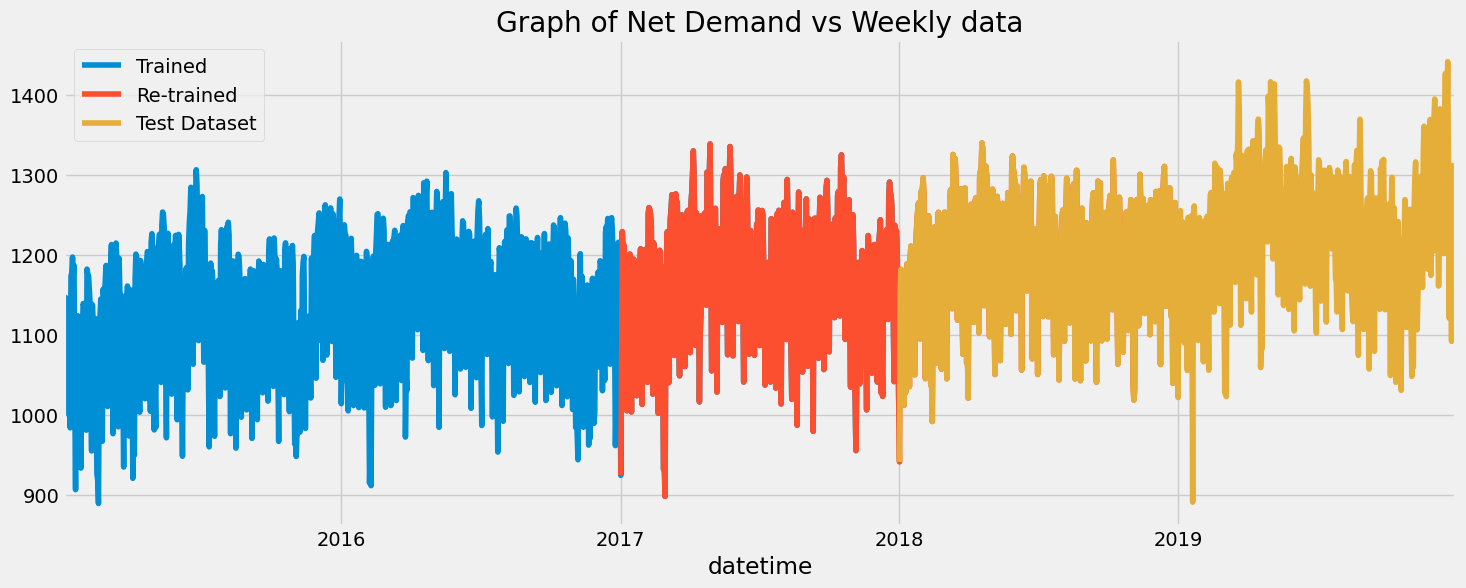

In [6]:
df_refined[:'2017'].plot(figsize=(16,6),legend=True)
df_refined['2017':'2018'].plot(figsize=(16,6),legend=True)
df_refined['2018':'2019'].plot(figsize=(16,6),legend=True)
plt.legend(['Trained','Re-trained','Test Dataset'])
plt.title('Graph of Net Demand vs Weekly data')
plt.show()

In [7]:
# Checking for missing values
test_set = df_refined['2018':'2019'].values
test_set=test_set.reshape((test_set.shape[0],1))

In [8]:
print("Test Set Shape : ",test_set.shape)

Test Set Shape :  (730, 1)


**Imported Model**

In [9]:
import joblib

In [10]:
model=joblib.load('/workspaces/codespaces-jupyter/models/GRU_updated_model')

In [11]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(test_set)
inputs = df_refined[len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

**Predicting the** *nat_demand*  **for 2020 and beyond**

In [12]:
X_test = []
for i in range(60,790):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_data = model.predict(X_test)
predicted_data = sc.inverse_transform(predicted_data)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [13]:
len(predicted_data), len(inputs)

(730, 1333)

**Actual Demand vs Predicted Demand**

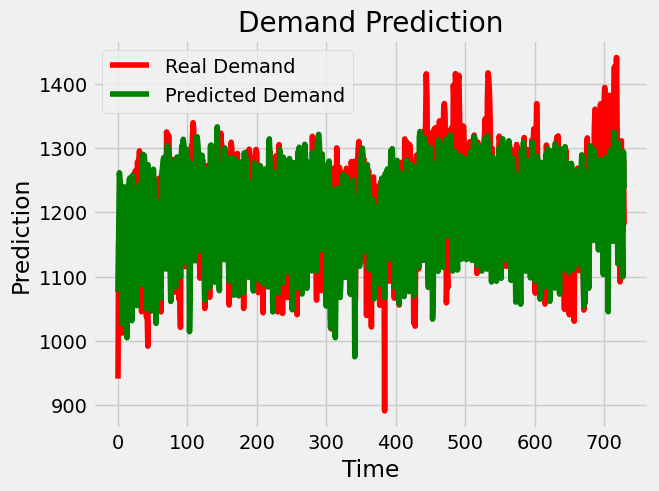

In [14]:
plot_predictions(test_set,predicted_data)

In [17]:
return_rmse(test_set,predicted_data)

The root mean squared error is 61.009121115897074.
